<a href="https://colab.research.google.com/github/FREDY129053/AI_Systems_LABS/blob/main/Lab_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа "Первичный анализ наборов данных"

## Получение данных

In [1]:
!wget http://archive.ics.uci.edu/static/public/262/turkiye+student+evaluation.zip
!pip install patool

--2025-10-09 04:29:58--  http://archive.ics.uci.edu/static/public/262/turkiye+student+evaluation.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘turkiye+student+evaluation.zip’

turkiye+student+eva     [  <=>               ] 804.59K  2.09MB/s    in 0.4s    

2025-10-09 04:29:58 (2.09 MB/s) - ‘turkiye+student+evaluation.zip’ saved [823901]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.5/86.5 kB 1.7 MB/s eta 0:00:00


In [2]:
import patoolib

patoolib.extract_archive('/content/turkiye+student+evaluation.zip')

INFO patool: Extracting /content/turkiye+student+evaluation.zip ...
INFO:patool:Extracting /content/turkiye+student+evaluation.zip ...
INFO patool: running /usr/bin/7z x -aou -o/content/Unpack_rc9k29eg -- /content/turkiye+student+evaluation.zip
INFO:patool:running /usr/bin/7z x -aou -o/content/Unpack_rc9k29eg -- /content/turkiye+student+evaluation.zip
INFO patool: ... /content/turkiye+student+evaluation.zip extracted to `turkiye+student+evaluation' (multiple files in root).
INFO:patool:... /content/turkiye+student+evaluation.zip extracted to `turkiye+student+evaluation' (multiple files in root).


'turkiye+student+evaluation'

In [3]:
CONTENT_DIR = "turkiye+student+evaluation"
FILE = CONTENT_DIR + "/turkiye-student-evaluation_generic.csv"

## Практические задания

In [4]:
import pandas as pd
import numpy as np

In [5]:
main_df = pd.read_csv(FILE)

### 1. Предложить методы анализа выбросов, учитывая особенности данных. Сделать анализ выбросов, удалить выбросы

#### Проверка гипотез

Проверка гипотез – это метод проверки утверждения или гипотезы о параметре в совокупности с использованием данных, измеренных в выборке. В этом методе мы проверяем гипотезу, определяя вероятность того, что статистическая величина выборки могла бы быть выбрана, если бы гипотеза относительно параметра общей совокупности была бы верной.

Цель проверки гипотезы – определить вероятность того, что параметр совокупности, такой как среднее значение, вероятно, будет истинным.
https://datafinder.ru/products/obnaruzhenie-vybrosov-s-pomoshchyu-python

In [6]:
import scipy.stats as stats

def check_ano(t):
  n = len(t)
  mean_t = np.array(t.mean())
  sd_t = np.array(t.std())
  numerator = max(abs(np.array(t)-mean_t))
  g_calc = numerator/sd_t
  t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
  g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
  print("-----------------------------------------")
  print(f"Вычесленное значение: {g_calc}")
  print(f"Критическое значение: {g_critical}")
  if g_critical > g_calc:
    print(f"{t.name} - Выбросов нет")
  else:
    print(f"{t.name} - Выбросы есть")
  print("-----------------------------------------\n")

main_df.apply(check_ano, axis=0)

-----------------------------------------
Вычесленное значение: 2.067672791876516
Критическое значение: 4.446306181227739
instr - Выбросов нет
-----------------------------------------

-----------------------------------------
Вычесленное значение: 1.701732924296256
Критическое значение: 4.446306181227739
class - Выбросов нет
-----------------------------------------

-----------------------------------------
Вычесленное значение: 3.3546047791571114
Критическое значение: 4.446306181227739
nb.repeat - Выбросов нет
-----------------------------------------

-----------------------------------------
Вычесленное значение: 1.5758900188233418
Критическое значение: 4.446306181227739
attendance - Выбросов нет
-----------------------------------------

-----------------------------------------
Вычесленное значение: 1.6430810637707849
Критическое значение: 4.446306181227739
difficulty - Выбросов нет
-----------------------------------------

-----------------------------------------
Вычесленное

instr         None
class         None
nb.repeat     None
attendance    None
difficulty    None
Q1            None
Q2            None
Q3            None
Q4            None
Q5            None
Q6            None
Q7            None
Q8            None
Q9            None
Q10           None
Q11           None
Q12           None
Q13           None
Q14           None
Q15           None
Q16           None
Q17           None
Q18           None
Q19           None
Q20           None
Q21           None
Q22           None
Q23           None
Q24           None
Q25           None
Q26           None
Q27           None
Q28           None
dtype: object

#### Isolation Forest

Обычные алгоритмы машинного обучения, например, SVM или нейросети, пытаются описать нормальное распределение данных, а затем искать выбросы. Isolation Forest идёт с другого конца: он не строит плотностную модель, а просто пытается изолировать выбросы.

Как это происходит:

- Строим дерево, где каждый узел случайно выбирает один признак и случайное значение разбиения.

- Рекурсивно делим данные, пока каждая точка не окажется в своём отдельном листе.

- Считаем аномальность точки по тому, насколько быстро она была изолирована (чем короче путь, тем аномальнее).

https://habr.com/ru/companies/otus/articles/881086/

In [7]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [8]:
model = IsolationForest(n_estimators=1000, max_samples=1000, random_state=42)
df_copy = main_df.copy()

df_copy["is_anomaly"] = model.fit_predict(df_copy[:])

In [9]:
df_copy['is_anomaly'] = df_copy['is_anomaly'].map({1: 0, -1: 1})

In [10]:
anomalies = df_copy[df_copy['is_anomaly'] == 1]
display(anomalies)

instr  class  nb.repeat  attendance  difficulty  Q1  Q2  Q3  Q4  Q5  \
14        1      2          1           2           3   1   1   1   1   1   
15        1      2          1           3           4   5   5   4   4   5   
22        1      2          1           3           3   3   3   3   3   3   
23        1      2          1           2           4   5   3   3   3   2   
26        1      2          1           1           2   1   1   1   1   5   
...     ...    ...        ...         ...         ...  ..  ..  ..  ..  ..   
5775      3     13          3           4           2   1   2   3   2   2   
5776      3     13          1           1           2   5   1   5   5   4   
5782      3     13          1           0           5   2   1   2   1   2   
5803      3     13          1           3           5   2   2   2   1   1   
5808      3     13          1           3           3   1   1   1   5   1   

      ...  Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  Q28  is_anomaly  
14    ...    3    3    3    2    2    1    1    1    1           1  
15    ...    4    4    5    5    4    4    4    5    4           1  
22    ...    2    1    1    1    3    2    2    2    2           1  
23    ...    2    4    4    5    5    4    4    5    5           1  
26    ...    5    5    5    5    5    5    5    5    5           1  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...         ...  
5775  ...    5    5    5    5    5    5    5    5    4           1  
5776  ...    5    5    4    5    5    5    5    4    5           1  
5782  ...    2    2    2    2    1    2    2    1    2           1  
5803  ...    1    1    1    1    1    1    1    1    1           1  
5808  ...    3    2    2    3    2    2    3    2    2           1  

[1200 rows x 34 columns]

#### Local Outlier Factor

Как работает LOF:
- Оценка локальной плотности: LOF вычисляет локальную плотность вокруг каждой точки данных, сравнивая плотность соседних точек. Для этого используется конкретная точка и определенное окружение вокруг нее.
- Сравнение плотностей: алгоритм вычисляет коэффициент локального выброса, сравнивая плотность интересующей точки с плотностями ее соседей. Если плотность точки намного ниже, чем у соседних, то, скорее всего, это выброс.
- Оценка и пороговое значение: LOF присваивает оценку каждой точке данных, указывая степень ее “отклонения”. Эта оценка может быть установлена как пороговая, чтобы классифицировать точки как нормальные или аномальные.

https://medium.com/@ilyurek/anomaly-detection-with-local-outlier-factor-lof-b1b82227c15e

In [11]:
from sklearn.neighbors import LocalOutlierFactor

In [23]:
lof_model = LocalOutlierFactor(n_neighbors=150, leaf_size=50)

df_copy_lof = main_df.copy()

df_copy_lof["is_anomaly"] = lof_model.fit_predict(df_copy_lof[:])

In [24]:
df_copy_lof['is_anomaly'] = df_copy_lof['is_anomaly'].map({1: 0, -1: 1})

In [25]:
anomalies_lof = df_copy_lof[df_copy_lof['is_anomaly'] == 1]
display(anomalies_lof)

instr  class  nb.repeat  attendance  difficulty  Q1  Q2  Q3  Q4  Q5  \
22        1      2          1           3           3   3   3   3   3   3   
23        1      2          1           2           4   5   3   3   3   2   
26        1      2          1           1           2   1   1   1   1   5   
42        1      2          2           1           3   2   3   3   3   2   
45        1      2          1           3           4   2   3   4   5   5   
...     ...    ...        ...         ...         ...  ..  ..  ..  ..  ..   
5733      3     13          1           1           4   3   4   5   3   4   
5744      3     13          1           4           4   3   3   3   3   3   
5755      3     13          1           3           2   2   2   3   2   3   
5775      3     13          3           4           2   1   2   3   2   2   
5803      3     13          1           3           5   2   2   2   1   1   

      ...  Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  Q28  is_anomaly  
22    ...    2    1    1    1    3    2    2    2    2           1  
23    ...    2    4    4    5    5    4    4    5    5           1  
26    ...    5    5    5    5    5    5    5    5    5           1  
42    ...    3    3    3    3    2    2    1    1    1           1  
45    ...    2    4    2    2    4    2    2    3    2           1  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...         ...  
5733  ...    2    3    4    4    2    5    3    4    4           1  
5744  ...    5    4    3    2    1    2    3    4    5           1  
5755  ...    3    4    2    3    2    3    2    2    3           1  
5775  ...    5    5    5    5    5    5    5    5    4           1  
5803  ...    1    1    1    1    1    1    1    1    1           1  

[932 rows x 34 columns]

Находим одинаковые аномалии, найденные двумя алгоритмами

In [29]:
common_anomaly_indices = anomalies.index.intersection(anomalies_lof.index)

common_anomalies = anomalies.loc[common_anomaly_indices]

display(common_anomalies)

instr  class  nb.repeat  attendance  difficulty  Q1  Q2  Q3  Q4  Q5  \
22        1      2          1           3           3   3   3   3   3   3   
23        1      2          1           2           4   5   3   3   3   2   
26        1      2          1           1           2   1   1   1   1   5   
42        1      2          2           1           3   2   3   3   3   2   
45        1      2          1           3           4   2   3   4   5   5   
...     ...    ...        ...         ...         ...  ..  ..  ..  ..  ..   
5733      3     13          1           1           4   3   4   5   3   4   
5744      3     13          1           4           4   3   3   3   3   3   
5755      3     13          1           3           2   2   2   3   2   3   
5775      3     13          3           4           2   1   2   3   2   2   
5803      3     13          1           3           5   2   2   2   1   1   

      ...  Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  Q28  is_anomaly  
22    ...    2    1    1    1    3    2    2    2    2           1  
23    ...    2    4    4    5    5    4    4    5    5           1  
26    ...    5    5    5    5    5    5    5    5    5           1  
42    ...    3    3    3    3    2    2    1    1    1           1  
45    ...    2    4    2    2    4    2    2    3    2           1  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...         ...  
5733  ...    2    3    4    4    2    5    3    4    4           1  
5744  ...    5    4    3    2    1    2    3    4    5           1  
5755  ...    3    4    2    3    2    3    2    2    3           1  
5775  ...    5    5    5    5    5    5    5    5    4           1  
5803  ...    1    1    1    1    1    1    1    1    1           1  

[729 rows x 34 columns]

Удаляем общие аномалии

In [30]:
main_df_copy = main_df.copy()
main_df_copy = main_df_copy.drop(common_anomalies.index)
print(f"Размер исходного датасета: {main_df.shape}")
print(f"Размер датасета после удаления выбросов: {main_df_copy.shape}")

Размер исходного датасета: (5820, 33)
Размер датасета после удаления выбросов: (5091, 33)


Для оценки преподавателей и курса можно сделать предположение, что студенты, которые **впервые** проходят курс и **не посещали** предмет не могут объективно ответить на вопросы и стоит их ответы исключить

In [37]:
my_anos = main_df_copy[(main_df_copy['attendance'] == 0) & (main_df_copy['nb.repeat'] == 1)]
display(my_anos)

main_df_copy = main_df_copy.drop(my_anos.index)
print(f"Размер исходного датасета: {main_df.shape}")
print(f"Размер датасета после удаления предложенных выбросов: {main_df_copy.shape}")

instr  class  nb.repeat  attendance  difficulty  Q1  Q2  Q3  Q4  Q5  \
0         1      2          1           0           4   3   3   3   3   3   
4         1      2          1           0           1   1   1   1   1   1   
25        1      2          1           0           2   1   1   2   2   2   
38        1      2          1           0           1   1   1   1   1   1   
41        1      2          1           0           3   5   5   5   5   5   
...     ...    ...        ...         ...         ...  ..  ..  ..  ..  ..   
5802      3     13          1           0           1   5   5   5   5   5   
5809      3     13          1           0           3   4   4   4   4   4   
5812      3     13          1           0           1   1   1   1   1   1   
5815      3     13          1           0           1   1   1   1   1   1   
5817      3     13          1           0           4   5   5   5   5   5   

      ...  Q19  Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  Q28  
0     ...    3    3    3    3    3    3    3    3    3    3  
4     ...    1    1    1    1    1    1    1    1    1    1  
25    ...    2    2    2    2    2    2    2    2    2    2  
38    ...    1    1    1    1    1    1    1    1    1    1  
41    ...    5    5    5    5    5    5    5    5    5    5  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
5802  ...    5    5    5    5    5    5    5    5    5    5  
5809  ...    4    4    4    4    4    4    4    4    4    4  
5812  ...    1    1    1    1    1    1    1    1    1    1  
5815  ...    1    1    1    1    1    1    1    1    1    1  
5817  ...    5    5    5    5    5    5    5    5    5    5  

[1468 rows x 33 columns]

Размер исходного датасета: (5820, 33)
Размер датасета после удаления предложенных выбросов: (3623, 33)


In [56]:
# main_df_copy.to_csv('result_lab1_wo_anos.csv', index=False)

### 2. Проанализировать матрицу корреляций оценок по различным критериям качества преподавания. Выявить значимые корреляции. Объяснить высокие и низкие корреляции

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
correlation_matrix = main_df_copy.corr()

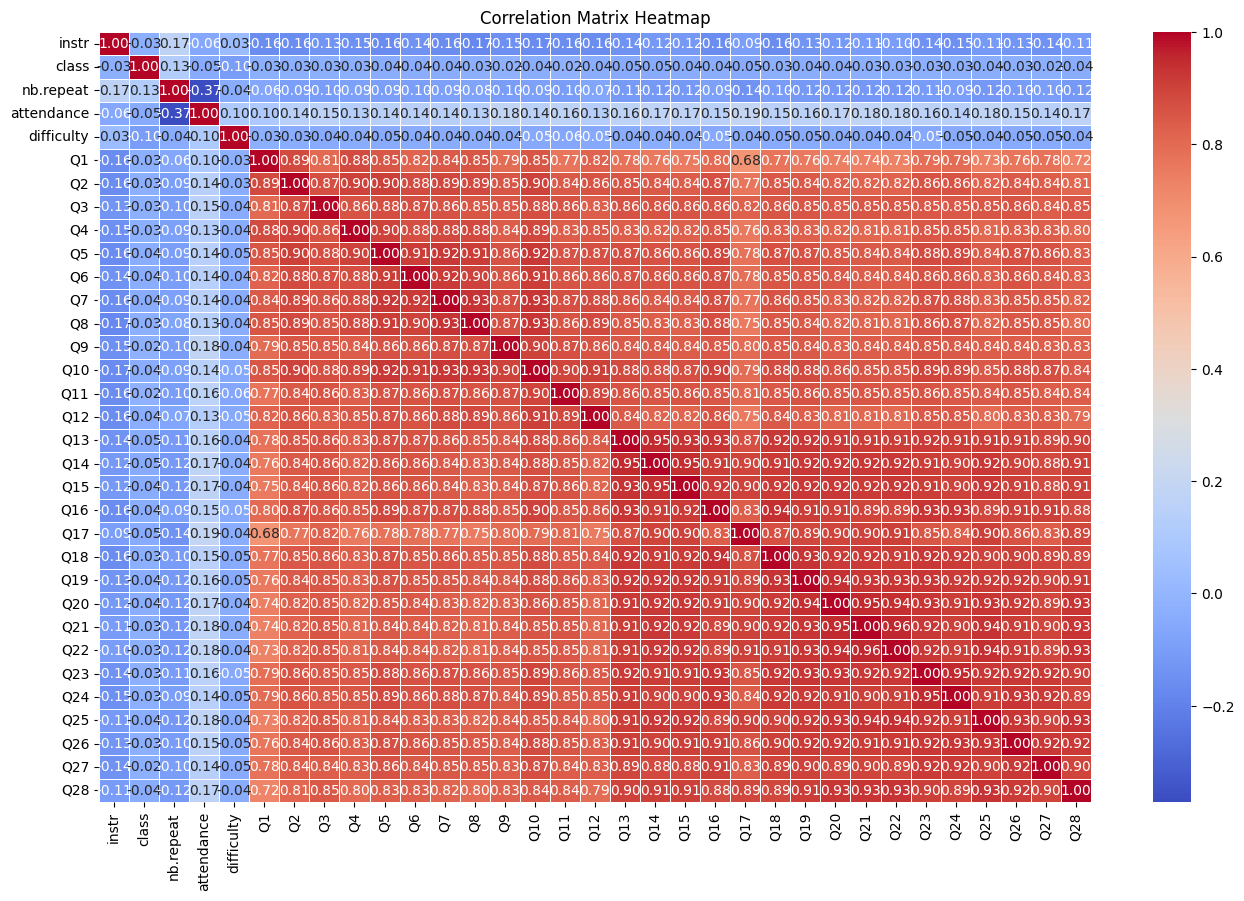

In [40]:
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Как видно по карте(и сказано было в примере) **вопросы** заметно коррелируют между собой, что можно объяснить их логическим порядком.

Видно, что **сложность** и **вопросы** коррелируют с посещаимостью.

Низкие корреляции показывают не связность данных.

### 3. Сравнить матрицы корреляций для разных предметов

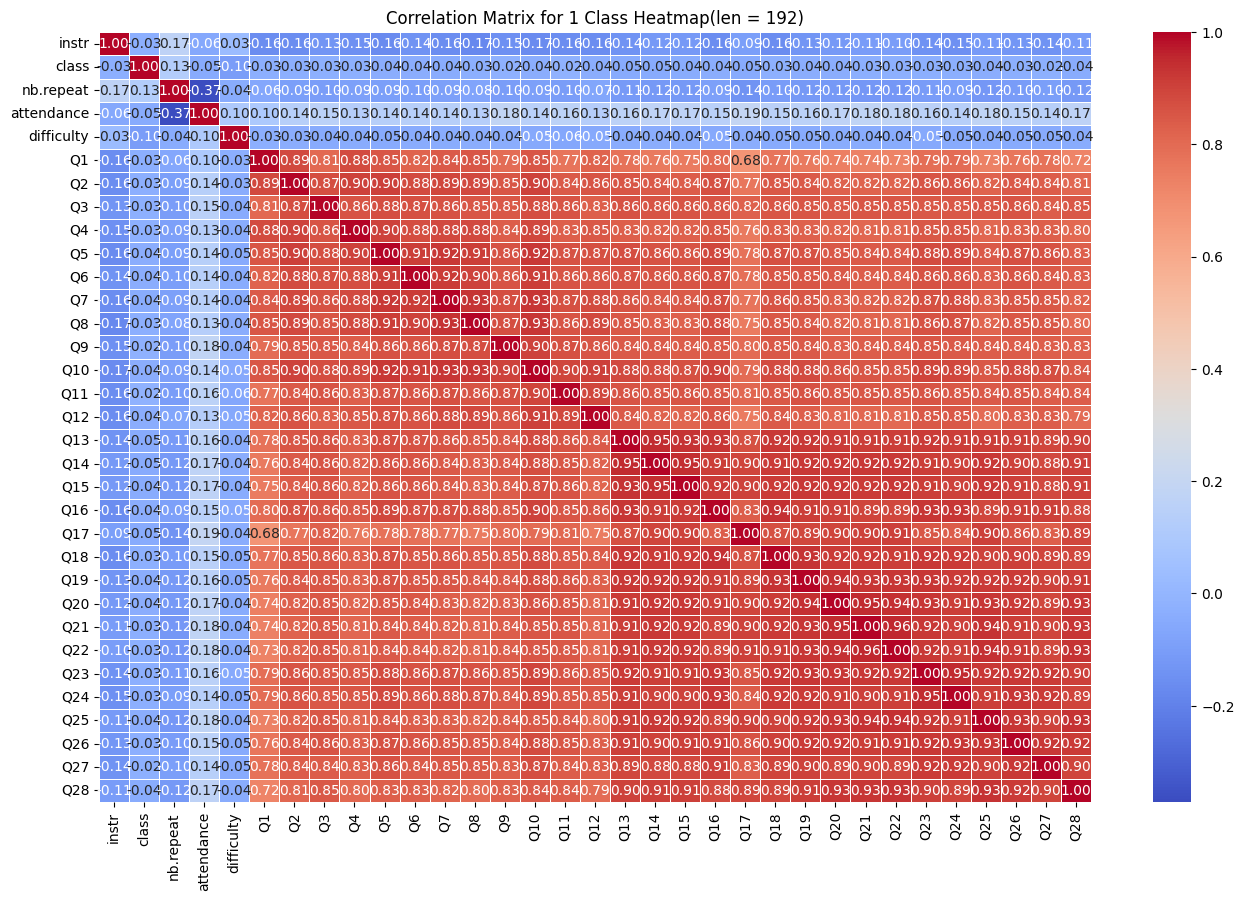

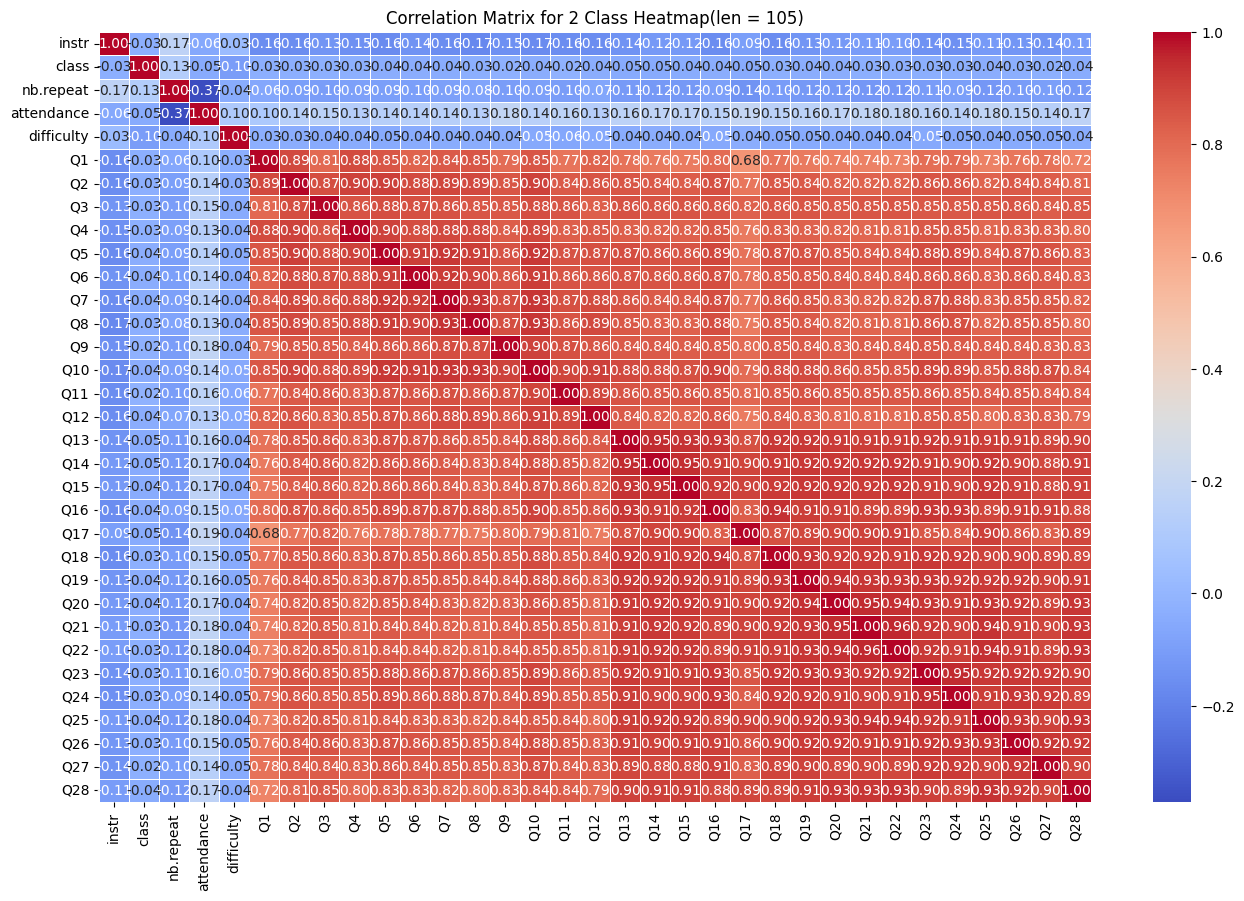

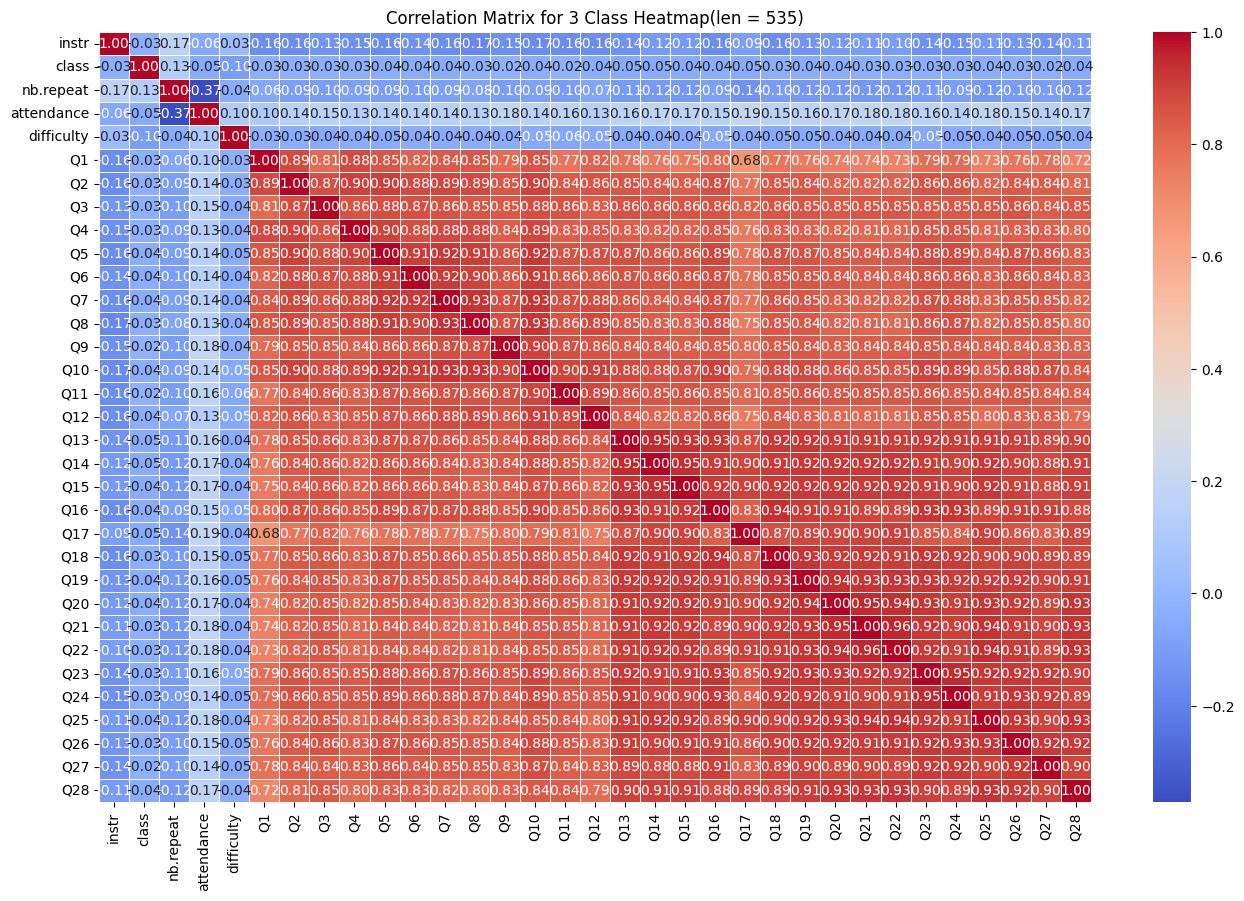

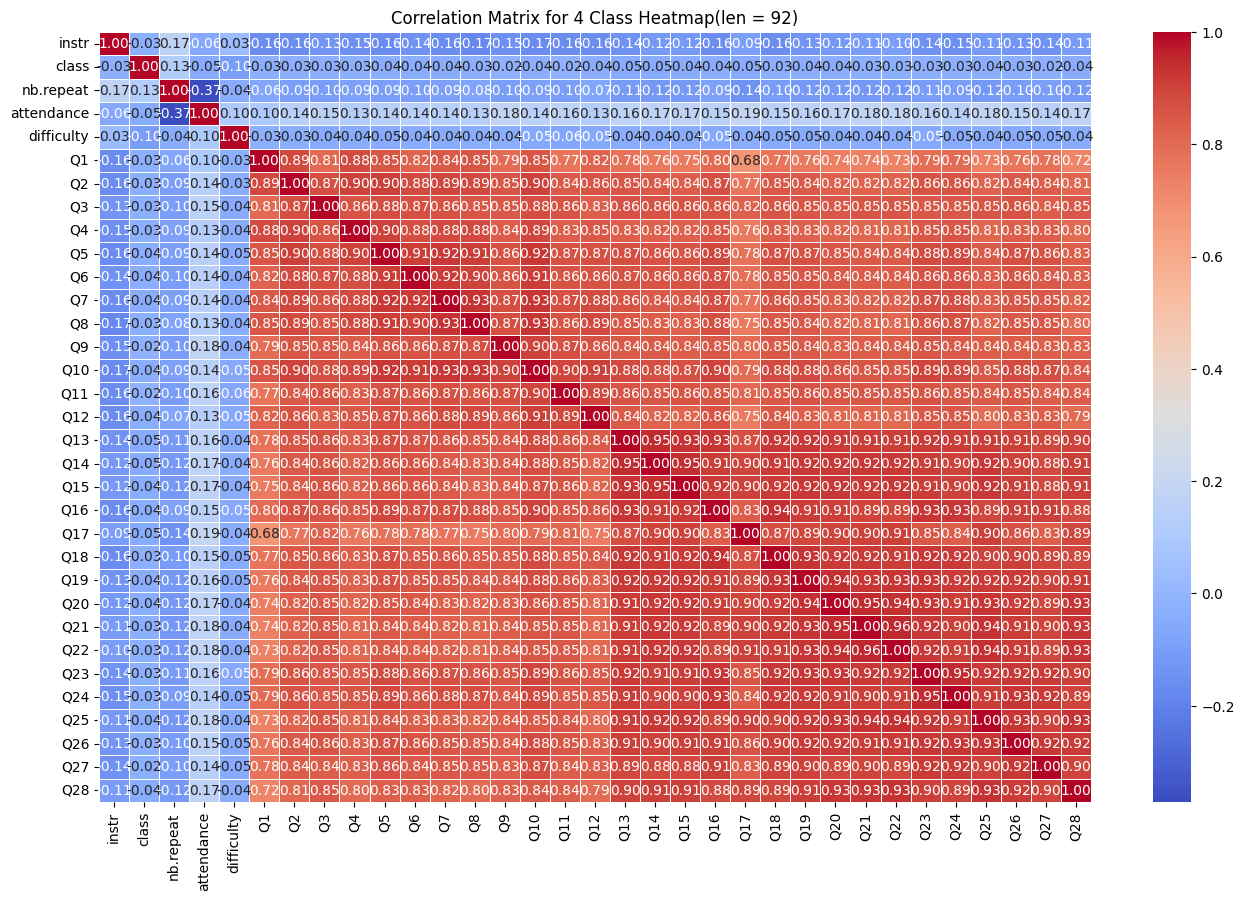

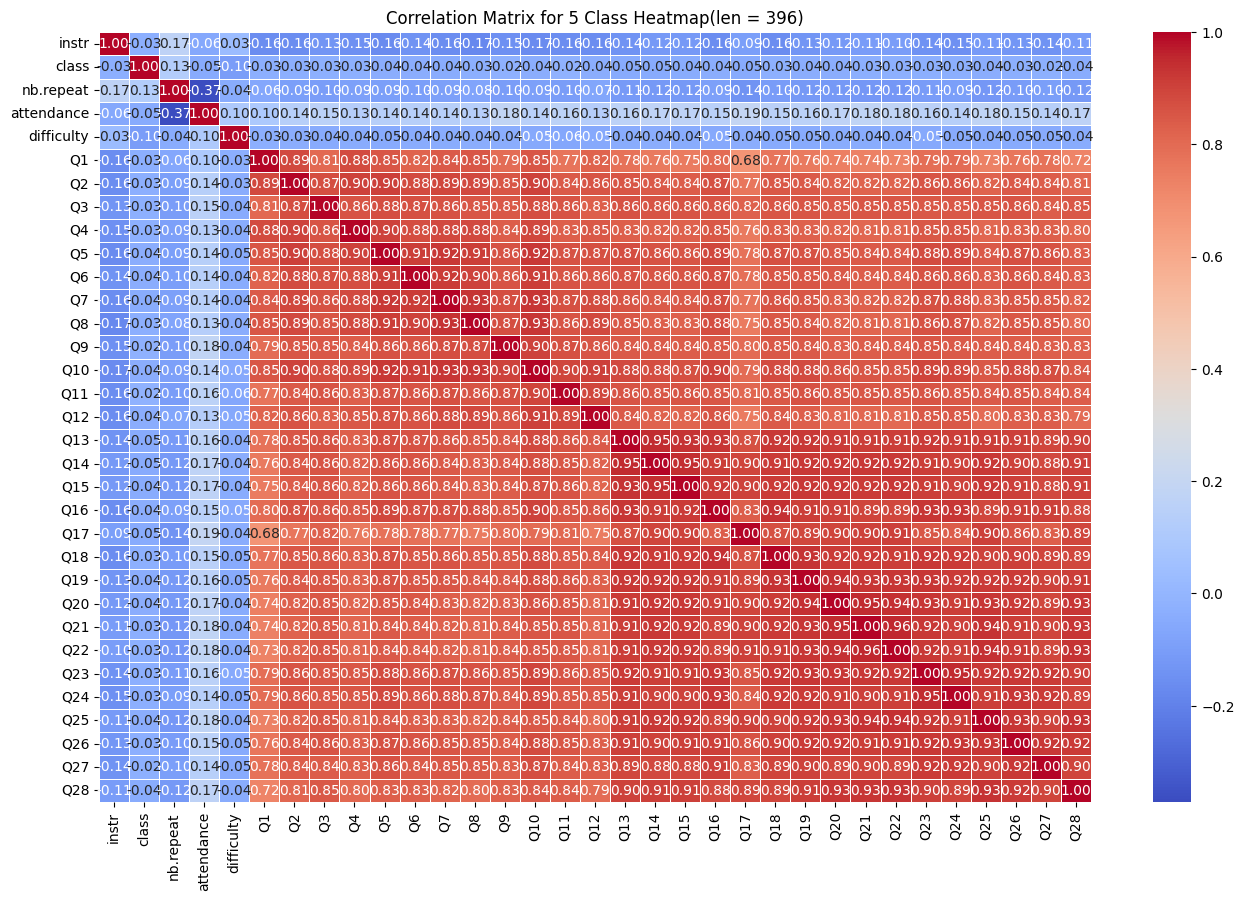

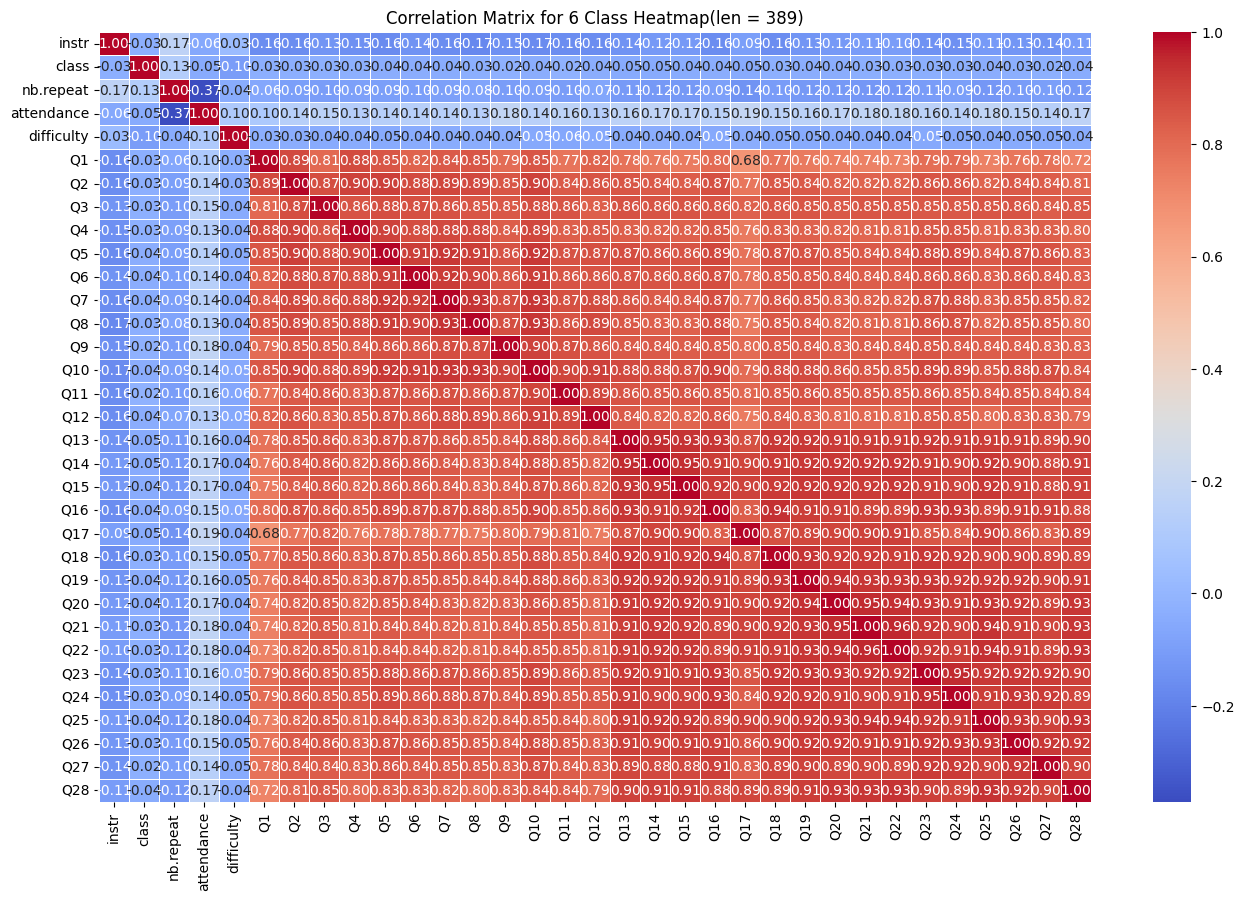

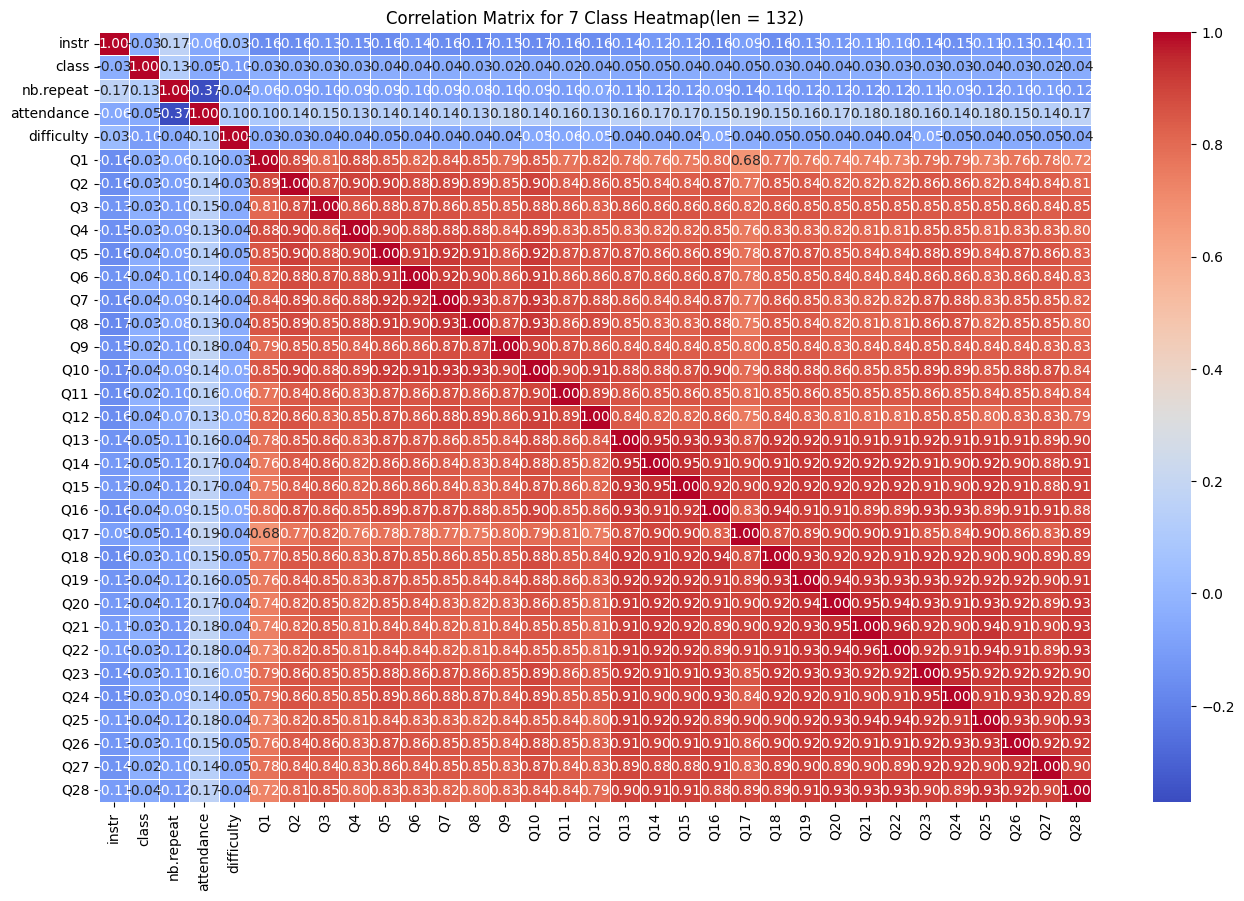

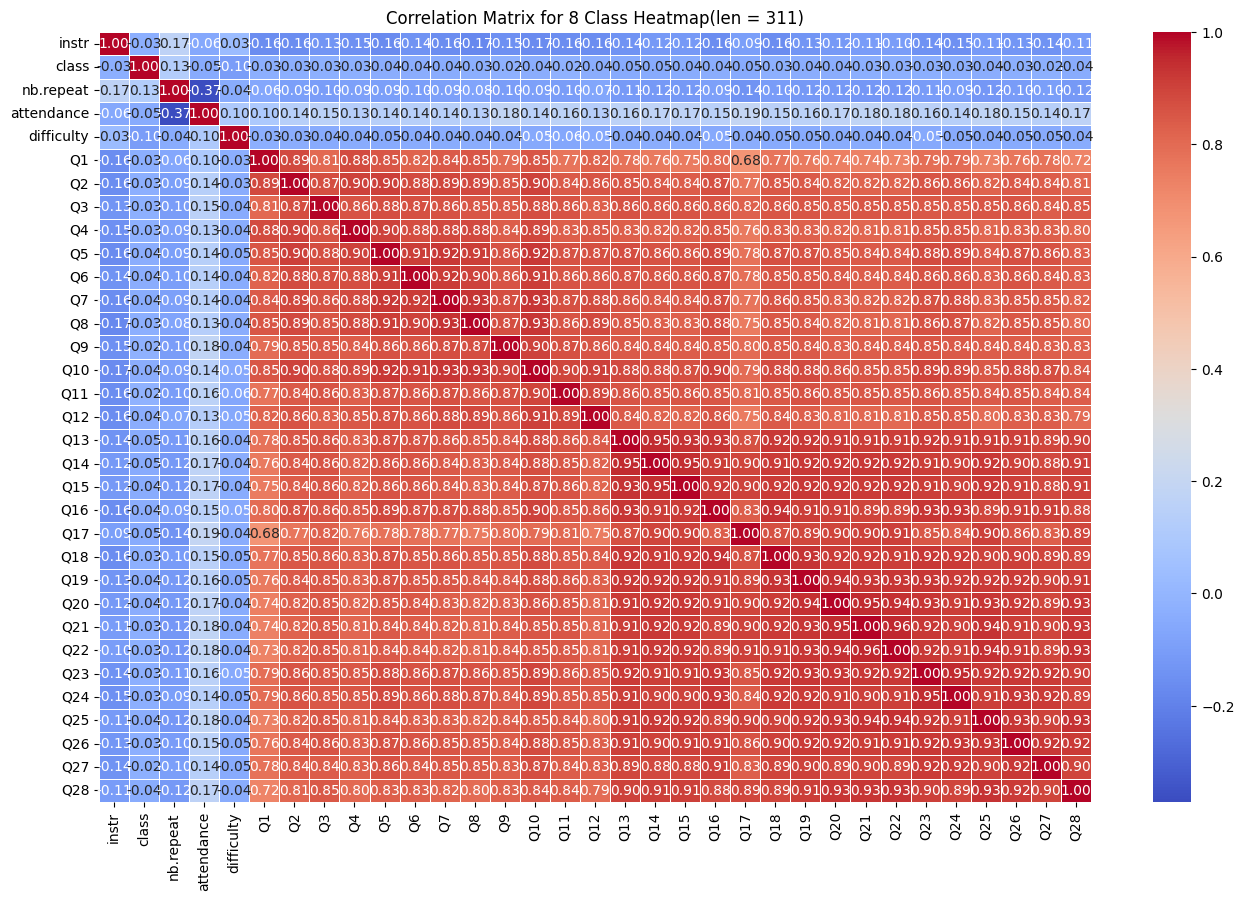

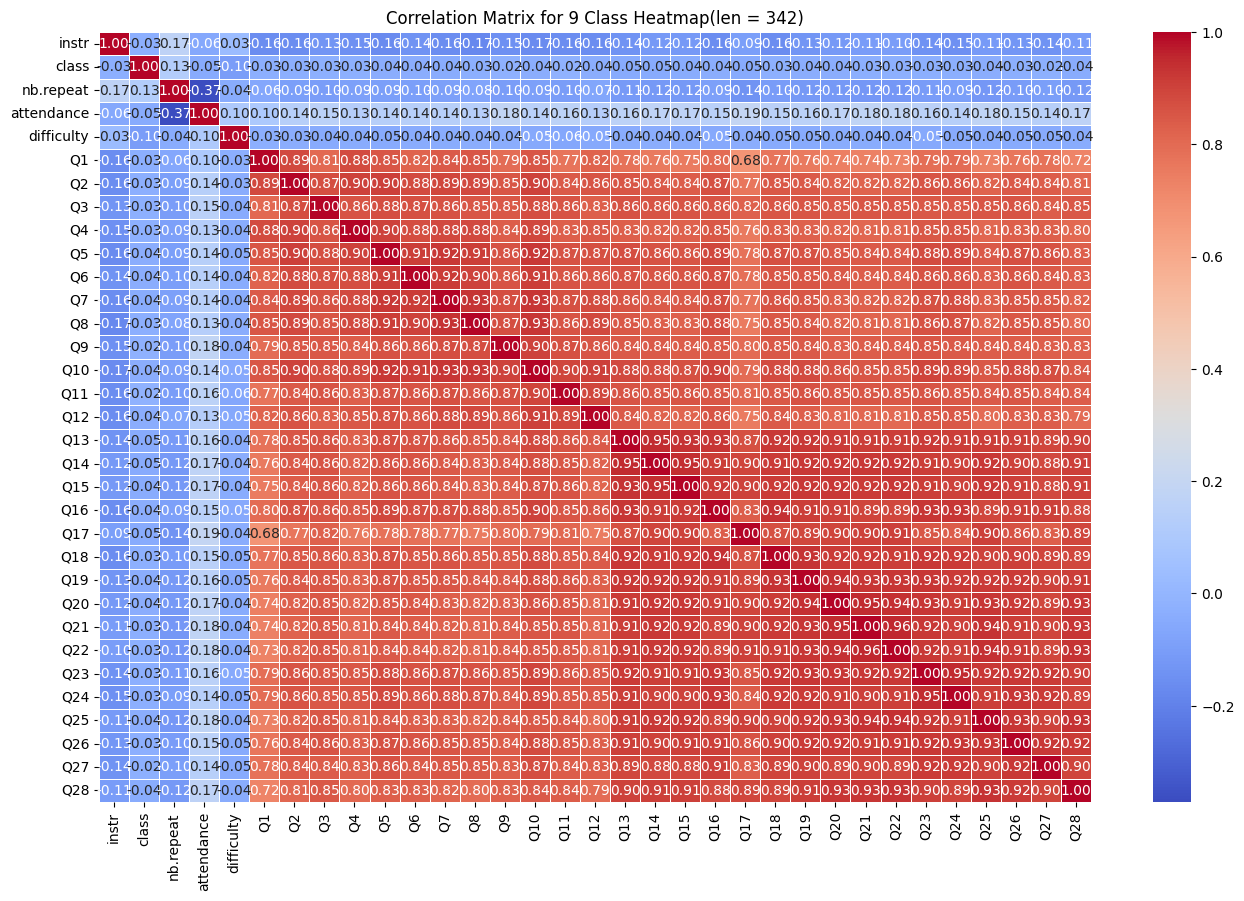

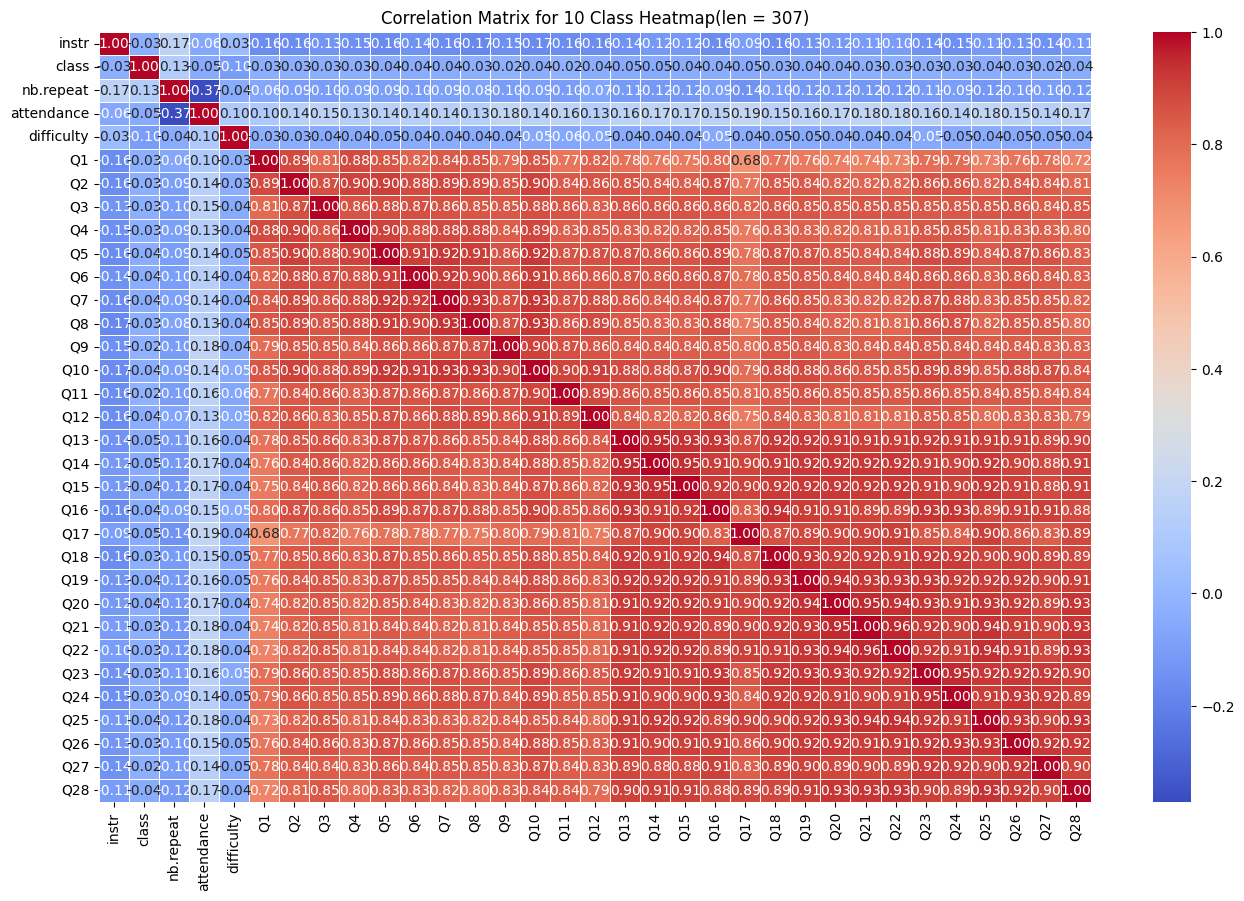

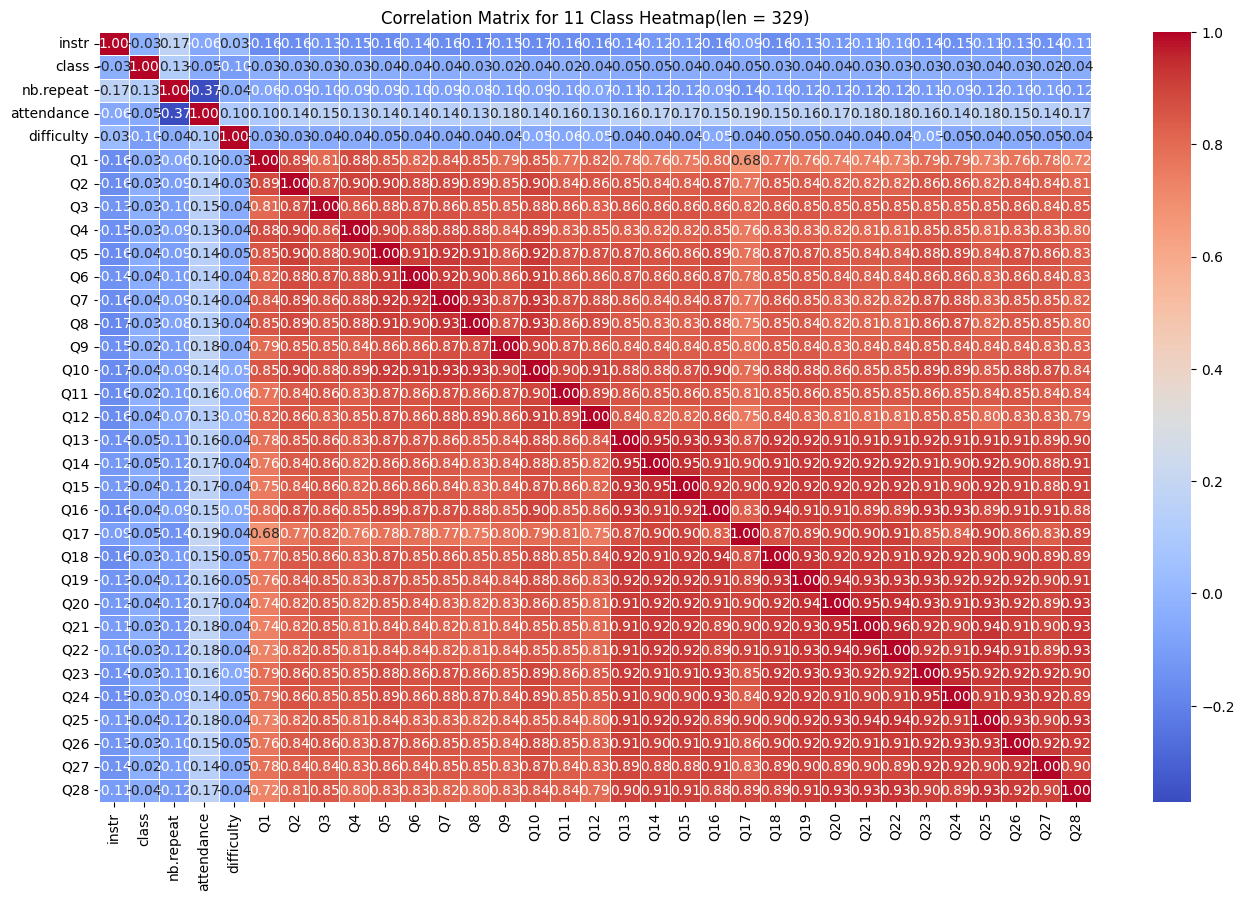

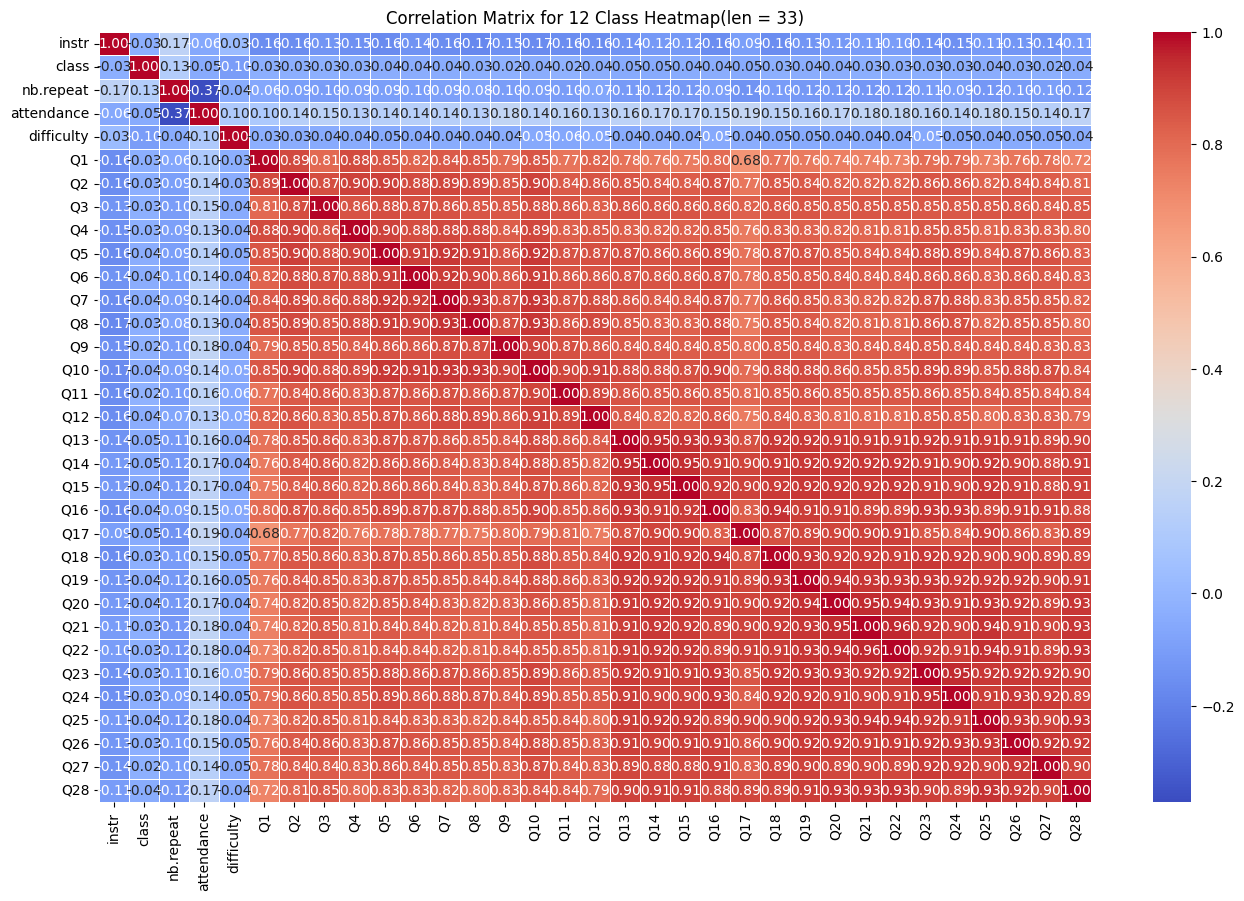

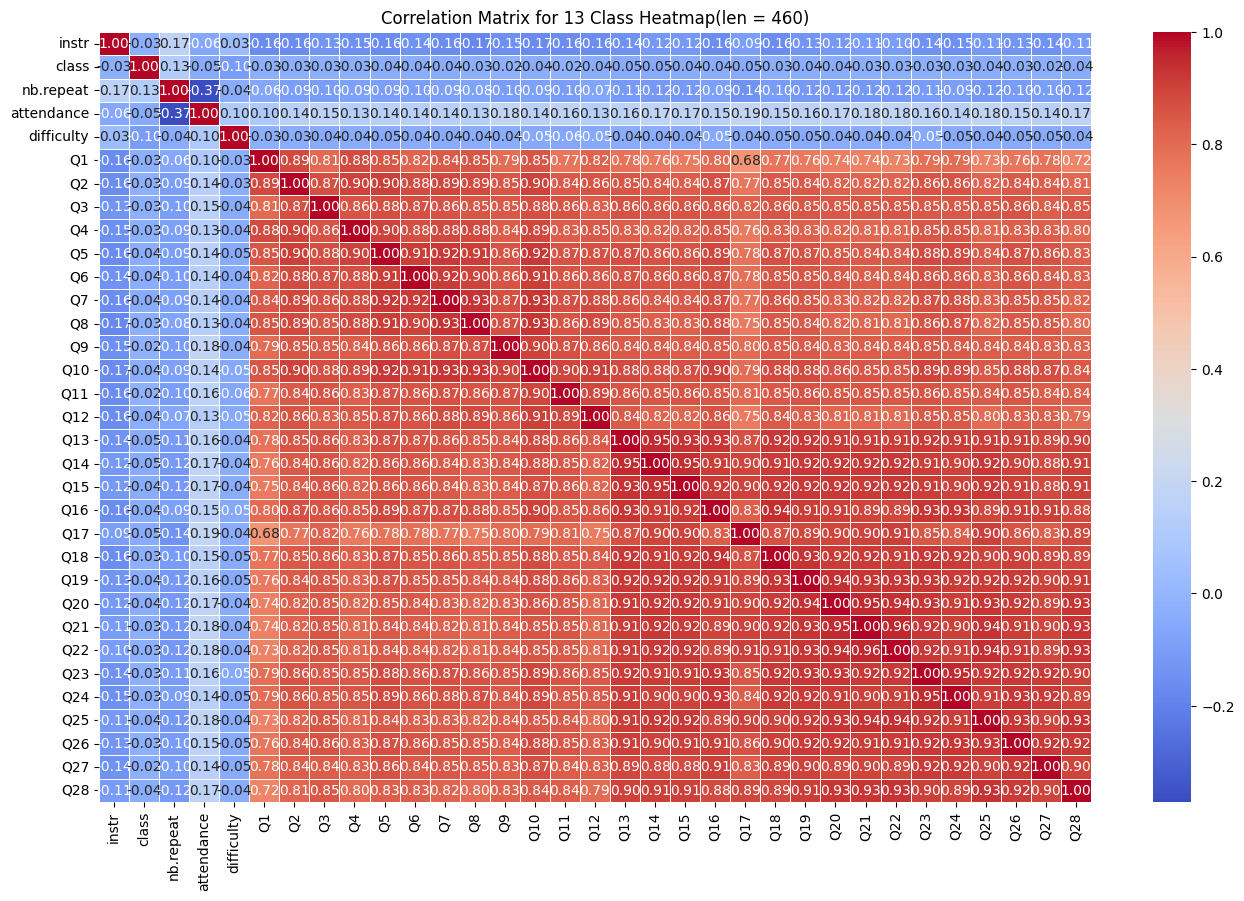

In [41]:
for cls in sorted(main_df_copy['class'].dropna().unique()):
  sub_df = main_df_copy[main_df_copy['class'] == cls]
  matrix = sub_df.corr()

  plt.figure(figsize=(16, 10))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
  plt.title(f'Correlation Matrix for {cls} Class Heatmap(len = {len(sub_df)})')
  plt.show()

Матрицы корреляций у всех предметов **одинаковые**

### 4. Проанализировать описательные статистики по преподавателям, разработать метод сравнения преподавателей по приведённым данным

In [42]:
instr_col = "instr"
Qcols = [f"Q{i}" for i in range(13,29)]  # Вопросы про преподавателя

In [43]:
df_copy = main_df_copy.copy()

In [44]:
df_copy["composite_mean"] = df_copy[Qcols].mean(axis=1)

In [45]:
# Считаем аггрегированную статистику
def summary_by_instr(col):
    g = df_copy.groupby(instr_col)[col]
    summary = g.agg(n="count", mean="mean", median="median", std="std")
    # Подсчет доли хороших оценок (4 и 5)
    summary["pct_4_5"] = g.apply(lambda s: (s>=4).sum() / s.count())
    return summary

summ_instr = summary_by_instr("composite_mean")

print("\nSummary (Q13-Q28):")
print(summ_instr)


Summary (Q13-Q28):
          n      mean  median       std   pct_4_5
instr                                            
1       544  3.558824     4.0  1.215607  0.540441
2       952  3.574711     4.0  1.061341  0.514706
3      2127  3.225552     3.0  1.136944  0.352139


<Figure size 600x400 with 0 Axes>

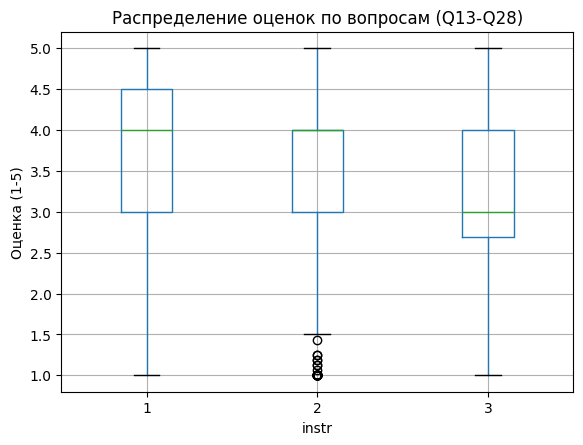

In [46]:
# Показывает распределение оценок: медиану, разброс, выбросы
# Легко увидеть, у кого оценки более стабильные, а у кого — разброс
plt.figure(figsize=(6,4))
df_copy.boxplot(column="composite_mean", by=instr_col)
plt.title("Распределение оценок по вопросам (Q13-Q28)")
plt.suptitle("")
plt.ylabel("Оценка (1-5)")
plt.show()

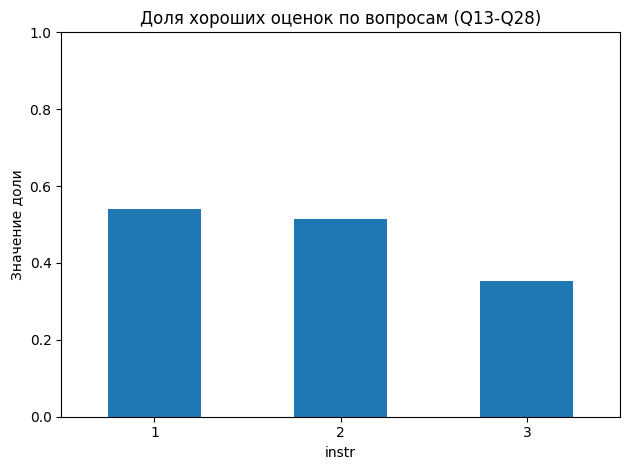

In [47]:
summ_instr["pct_4_5"].plot(kind="bar", rot=0)
plt.ylabel("Значение доли")
plt.title("Доля хороших оценок по вопросам (Q13-Q28)")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

Доля хороших оценок лучше у 1го и 2го преподавателя, но у 2го оценки не стабильнее, чем у остальных. 1го и 2го оценивают в целом на 4 балла из 5, чем 3го

In [48]:
# Простая проверка значимости (Kruskal-Wallis) — отвечает на вопрос: есть ли вообще статистические различия между инструкторами?
# - Если p < 0.05 → есть различия среди хотя бы двух инструкторов.
# - Если p ≥ 0.05 → различий не выявлено (статистически).
groups = [df_copy[df_copy[instr_col]==i]["composite_mean"].values for i in sorted(df_copy[instr_col].unique())]
H, p = stats.kruskal(*groups)
print(f"Kruskal-Wallis H={H:.3f}, p={p:.4f}")

Kruskal-Wallis H=94.859, p=0.0000


In [49]:
from itertools import combinations

def cliffs_delta(a,b):
    a = np.asarray(a); b=np.asarray(b)
    n1,n2=len(a),len(b)
    greater = sum(np.sum(b < ai) for ai in a)
    lesser  = sum(np.sum(b > ai) for ai in a)
    return (greater - lesser) / (n1*n2)

if p < 0.05:
    instrs = sorted(df_copy[instr_col].unique())
    pair_results = []
    for i,j in combinations(instrs,2):
        a = df_copy[df_copy[instr_col]==i]["composite_mean"]
        b = df_copy[df_copy[instr_col]==j]["composite_mean"]
        u, p_mw = stats.mannwhitneyu(a,b, alternative='two-sided')
        d = cliffs_delta(a,b)
        pair_results.append((i,j, p_mw, d))
    pr = pd.DataFrame(pair_results, columns=["i","j","p_mannwhitney","cliffs_delta"])
    print("\nPairwise Mann-Whitney + Cliff's delta:")
    print(pr)

# cliffs_delta ≈ 0 — нет эффекта; ±0.15 — маленький; ±0.33 — средний; ±0.47 — большой.


Pairwise Mann-Whitney + Cliff's delta:
   i  j  p_mannwhitney  cliffs_delta
0  1  2   3.950698e-01      0.025952
1  1  3   4.326998e-12      0.190081
2  2  3   7.095646e-17      0.185712


### 5. Проанализировать описательные статистики по предметам, разработать метод сравнения предметов по данным из набора

In [50]:
class_col = "class"
Qcols = [f"Q{i}" for i in range(1, 29)]

In [51]:
df_copy = main_df_copy.copy()
df_copy["composite_mean"] = df_copy[Qcols].mean(axis=1)

In [52]:
# Считаем аггрегированную статистику
def summary_by_instr(col):
    g = df_copy.groupby(class_col)[col]
    summary = g.agg(n="count", mean="mean", median="median", std="std")
    # Подсчет доли хороших оценок (4 и 5)
    summary["pct_4_5"] = g.apply(lambda s: (s>=4).sum() / s.count())
    return summary

summ_instr = summary_by_instr("composite_mean")

print("\nSummary (Q1-Q28):")
print(summ_instr)


Summary (Q1-Q28):
         n      mean    median       std   pct_4_5
class                                             
1      192  3.599888  3.928571  0.989599  0.479167
2      105  3.784694  4.000000  1.228709  0.600000
3      535  3.088318  3.000000  1.121664  0.289720
4       92  2.918866  3.000000  0.899514  0.119565
5      396  3.356331  3.357143  0.990055  0.328283
6      389  3.470162  3.750000  1.095912  0.416452
7      132  3.181006  3.160714  1.239689  0.310606
8      311  3.312586  3.357143  1.049126  0.299035
9      342  3.193818  3.000000  1.033818  0.263158
10     307  3.607492  4.000000  1.134718  0.540717
11     329  3.477746  3.571429  0.997647  0.410334
12      33  3.181818  3.178571  1.231799  0.333333
13     460  3.007453  3.000000  1.280000  0.308696


<Figure size 1200x1000 with 0 Axes>

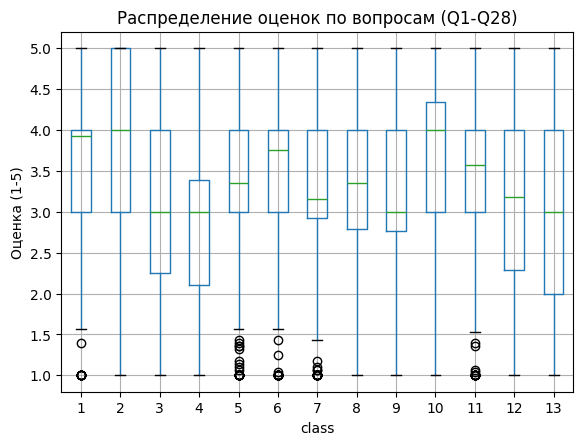

In [53]:
plt.figure(figsize=(12,10))
df_copy.boxplot(column="composite_mean", by=class_col)
plt.title("Распределение оценок по вопросам (Q1-Q28)")
plt.suptitle("")
plt.ylabel("Оценка (1-5)")
plt.show()

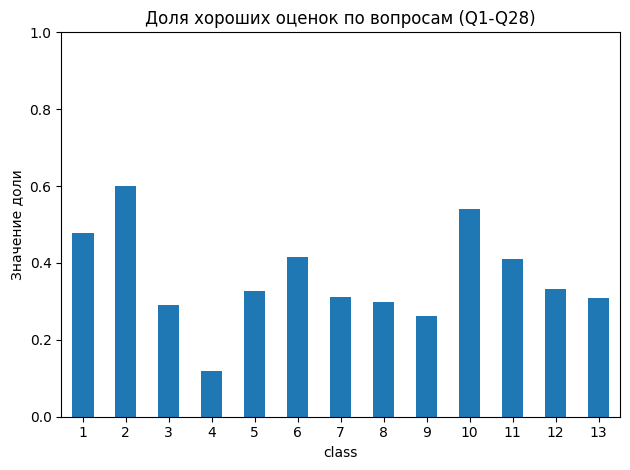

In [54]:
summ_instr["pct_4_5"].plot(kind="bar", rot=0)
plt.ylabel("Значение доли")
plt.title("Доля хороших оценок по вопросам (Q1-Q28)")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

Ученики предпочитают предмет 2 и 10 больше всех остальных. Предметы 4 и 12 можно не сравнивать с другими, т.к. мало ответов про него